In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path ='./data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [3]:
"""
총 193개의 데이터 나라와 대륙별 데이터를 제외 전부 수치적인 데이터 
"""

'\n총 193개의 데이터 나라와 대륙별 데이터를 제외 전부 수치적인 데이터 \n'

In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [5]:
corr = drinks[['beer_servings','wine_servings']].corr(method= 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [6]:
#feature 간 상관계수 행렬 구하기
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [7]:
"""
위에 있는 행렬을 조금더 쉽게 표현하기 위해 'heatmap' 과 'pair plot'을 사용 
heatmap 의 경우 corr.values를 pairplot의 경우 데이터 프레임을 파라미터로 넣어 준다. 
"""


"\n위에 있는 행렬을 조금더 쉽게 표현하기 위해 'heatmap' 과 'pair plot'을 사용 \nheatmap 의 경우 corr.values를 pairplot의 경우 데이터 프레임을 파라미터로 넣어 준다. \n"

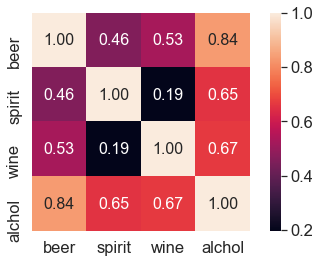

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

"""
corr 행렬 을 히트맵으로 시각화
"""

cols_view = ['beer','spirit','wine','alchol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
     cbar = True,
     annot = True,
     square = True,
     fmt = ".2f",
     annot_kws = {'size' : 16},
     yticklabels = cols_view,
     xticklabels = cols_view
)

plt.tight_layout()
plt.show()



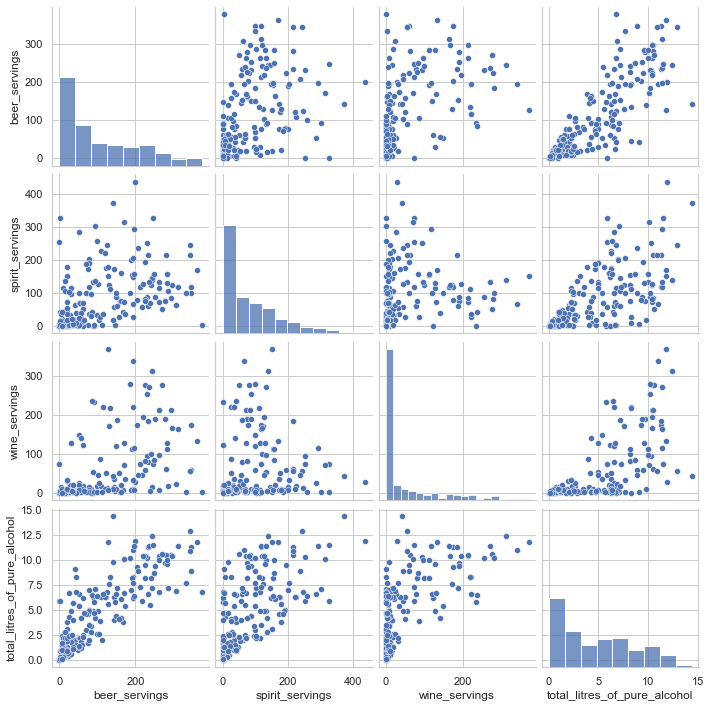

In [9]:
"""
시각화 라이브러리를 이용한 피처간의 산점도 그래프를 출력
"""
sns.set(style= 'whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']],height=2.5)

In [10]:
"""
결측치 데이터 전처리 하기
"""
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64
['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


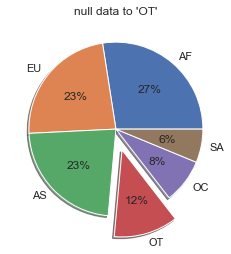

In [11]:
"""
전체 대륙중에서 OT가 차지하는 비율이 얼마나 되는지를 파이차트로 확인 한다.
"""

labels = drinks['continent'].value_counts()
print(labels)
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
print(labels)
print(fracs1)
explode = (0,0,0,0.25,0,0) #OT 만 중심에서 25% 벗어나는 정도로 실행 
plt.pie(fracs1,explode=explode,labels=labels,autopct='%0.f%%',shadow=True)
plt.title('null data to \'OT\'')
plt.show()




In [12]:
"""
대륙별 sprit_servings의 통계적 정보는 어느 정도 일까?
"""
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [13]:
"""
전체 평균보다 많은 알코올을 섭취하는 대륙은 어디 일까?
"""
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [14]:
"""
평균 맥주 소비량이 가장 높은 대륙은 어디 일까?
"""
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent


'EU'

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


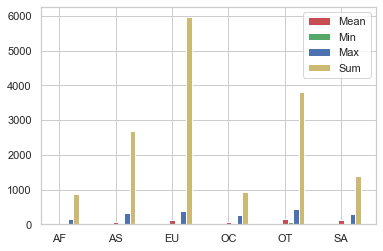

In [23]:
"""
맥주를 가장 좋아하는 대륙은 유럽이다. 
"""
n_groups = len(result.index)
n_groups
means = result['mean'].tolist()
print(means)
mins = result['min'].tolist()
print(mins)
maxs = result['max'].tolist()
print(maxs)
sums = result['sum'].tolist()
print(sums)

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index,means,bar_width,color='r',label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index,result.index.tolist())
plt.legend()
plt.show()



['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'mean']
[3.00754716981132, 2.1704545454545454, 8.617777777777777, 3.3812500000000005, 5.995652173913044, 6.308333333333334, 4.717098445595855]


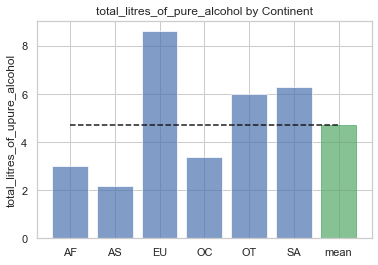

In [24]:
"""
대륙별 total_litres_of_pure_alcohol을 시각화 합니다."""

continents = continent_mean.index.to_list()
continents.append('mean')
print(continents)
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
print(alcohol)
bar_list = plt.bar(x_pos,alcohol,align='center',alpha = 0.7)
bar_list[len(continents) -1].set_color('g')
plt.plot([0.,6],[total_mean,total_mean],"k--")
plt.xticks(x_pos,continents)

plt.ylabel('total_litres_of_upure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()


['AF', 'AS', 'EU', 'OC', 'OT', 'SA']
[3258, 1630, 8720, 1435, 3345, 2101]


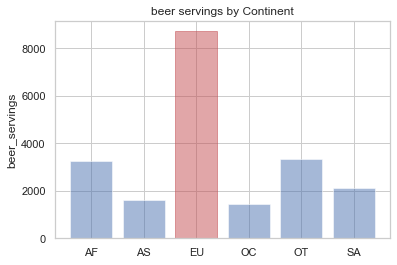

In [26]:
#대륙별 beer_servings를 시각화합니다.

beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
print(continents)
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
print(alcohol)

bar_list = plt.bar(y_pos,alcohol,align='center',alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos,continents)
plt.ylabel('beer_servings')
plt.title('beer servings by Continent')

plt.show()



In [30]:
#아프리카와 유럽간 맥주 소비량 차이 검정하기
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'],equal_var = False)
#위에는 두집단의 분산이 같은경우 아래는 두집단의 분산이 같지 않은 경우
print("The t-statistic and p-value assuming equal variance is %.3f and %.3f" %tTestResult)
print("The t-statistic and p-value not assuming equal variance is %.3f and %.3f" % tTestResultDiffVar)

#두집단의 귀무가설인 '두 집단의 평균이 같다' 는 P-value가 0이기애 기각이 되었고 -> 이에따라 대립가설인 '두집단의 평균이 다르다' 가 채택이 된다.
#당연히 데이터의 크기도 다르고 각각의 크기 또한 크지 않기에 실제로 통계적인 의미를 가지는 검정이라고 보기에는 어렵다는 결론이다.
#하지만 통계적인 분석을 하기에 좋은조건이라면 이러한 방법을 사용하면 좋을것 같다.


The t-statistic and p-value assuming equal variance is -7.268 and 0.000
The t-statistic and p-value not assuming equal variance is -7.144 and 0.000


In [39]:
#대한 민국은 술을 얼마나 독하게 마시는 나라인지 탐색해 보기 
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#total_servings 피처를 생성한다.
drinks['total_servings'] =drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
#print(drinks['total_servings'])
#술 소비량 대비 알코올 비율 피처를 생성한다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks ['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

#순위 정보를 생성 
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'],ascending= 0)
country_with_rank.head(5)


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


0.0593939393939394


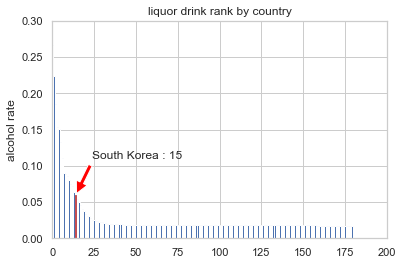

In [83]:
country_list = country_with_rank.country.to_list()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.to_list()

bar_list = plt.bar(x_pos,rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

korea_rank = country_list.index("South Korea")

print(country_with_rank[country_with_rank['country']
                        == 'South Korea']['alcohol_rate'].values[0])
korea_alc_rate = country_with_rank[country_with_rank['country']
                                   == 'South Korea']['alcohol_rate'].values[0]
#['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1),
             xy=(korea_rank, korea_alc_rate),
             xytext=((korea_rank + 10), (korea_alc_rate + 0.05)),
             arrowprops = dict(facecolor='red',shrink=0.05))

plt.show()



In [84]:
"""
1.대부분의 국가의 총 알코올 소비량은 맥주 소비량에 영향을 받을 확률이 높음 . 대부분의 국가에서는 맥주가 가장 많이 소비되는 술이라는 해석이 가능함 
2.유럽이 가장 맥주 소비량이 높음 대륙별로 상이한 차이 까지 있음 
3.술 소비량 대비 알코올 비율이라는 새로운 피처를 생성함으로써 술을 독하게 마시는 정도의 국가별 차이를 관찰 가능함 
4.t-test 분석결과 유럽간의 소비량은 통계적으로 유의미한 차이를 보인다. 하지만 위의 분석은 데이터 크기가 매우 다르고 정규분포를 가진다는 것을 확정할수 없기에 신뢰할만한 정보라 보기 어렵다
"""

'\n1.대부분의 국가의 총 알코올 소비량은 맥주 소비량에 영향을 받을 확률이 높음 . 대부분의 국가에서는 맥주가 가장 많이 소비되는 술이라는 해석이 가능함 \n2.유럽이 가장 맥주 소비량이 높음 대륙별로 상이한 차이 까지 있음 \n3.술 소비량 대비 알코올 비율이라는 새로운 피처를 생성함으로써 술을 독하게 마시는 정도의 국가별 차이를 관찰 가능함 \n4.t-test 분석결과 유럽간의 소비량은 통계적으로 유의미한 차이를 보인다. 하지만 위의 분석은 데이터 크기가 매우 다르고 정규분포를 가진다는 것을 확정할수 없기에 신뢰할만한 정보라 보기 어렵다\n'